#### Challenge: evaluate your sentiment classifier
Using the evaluation techniques we've covered here, look at your classifier's performance in more detail. Then go back and iterate by engineering new features, removing poor features, or tuning parameters. 

**Repeat this process until you have five different versions of your classifier.** Once you've iterated, answer these questions to compare the performance of each:

    Do any of your classifiers seem to overfit?
    Which seem to perform the best? Why?
    Which features seemed to be most impactful to performance?

Write up your iterations and answers to the above questions in a few pages. Submit a link below and go over it with your mentor to see if they have any other ideas on how you could improve your classifier's performance.

##### Classifier from previous challenge

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

data source: https://archive.ics.uci.edu/ml/machine-learning-databases/00331/

training data set: amazon_cells_labelled.txt delimiter: sentence \t score \n

In [2]:
data_path = (r'C:\Users\katec\Thinkful\data_collections\sentiment labelled sentences\amazon_cells_labelled.txt')
amazon_raw = pd.read_csv(data_path, delimiter= '\t', header=None)
amazon_raw.columns = ['sentence', 'score']

In [3]:
amazon_raw.head()

,sentence,score
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [4]:
amazon_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
sentence    1000 non-null object
score       1000 non-null int64
dtypes: int64(1), object(1)
memory usage: 15.7+ KB


In [5]:
keywords = ['good', 'great', 'wonderful', 'fantastic', 'love', 
            'excellent', 'value', 'problems', 'must have', 
            'wasted', 'impressed', 'recommend', 'loved', 'problem', 
            'best', 'helpful', 'hate', 'hated', 'poor', 'nice', 
            'disappointed', 'like', 'didn\'t like', 'sturdy', 
            'happy', 'complaints', 'drawback', 'comfortable', 
            'uncomfortable', 'not working', 'bargain', 'well', 
            'broke', 'super', 'beware', 'supposedly', 'beautiful', 
            'unhappy', 'winner', 'upset', 'damaged', 'failed',
            'waste', 'glad', 'limited', 'does not', 'flaw', 'flawed',
            'bad', 'useless', 'worst', 'horrible', 'pleased', 'excited',
            'mistake', 'do not', 'smell', 'incredible', 'unreliable',
            'helpful', 'junk', 'terrible', 'wise', 'lacking', 'money back',
            'sucks', 'worst', 'average', 'broke', 'defect', 'difficult',
            'rocks', 'frustrated', 'avoid', 'easy', 'nice', 'crashed',
            'sorry', 'joy']

for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    amazon_raw[str(key)] = amazon_raw.sentence.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

In [6]:
amazon_raw['allcaps'] = amazon_raw.sentence.str.isupper()

In [7]:
amazon_raw['score'] = (amazon_raw['score'] == 0)

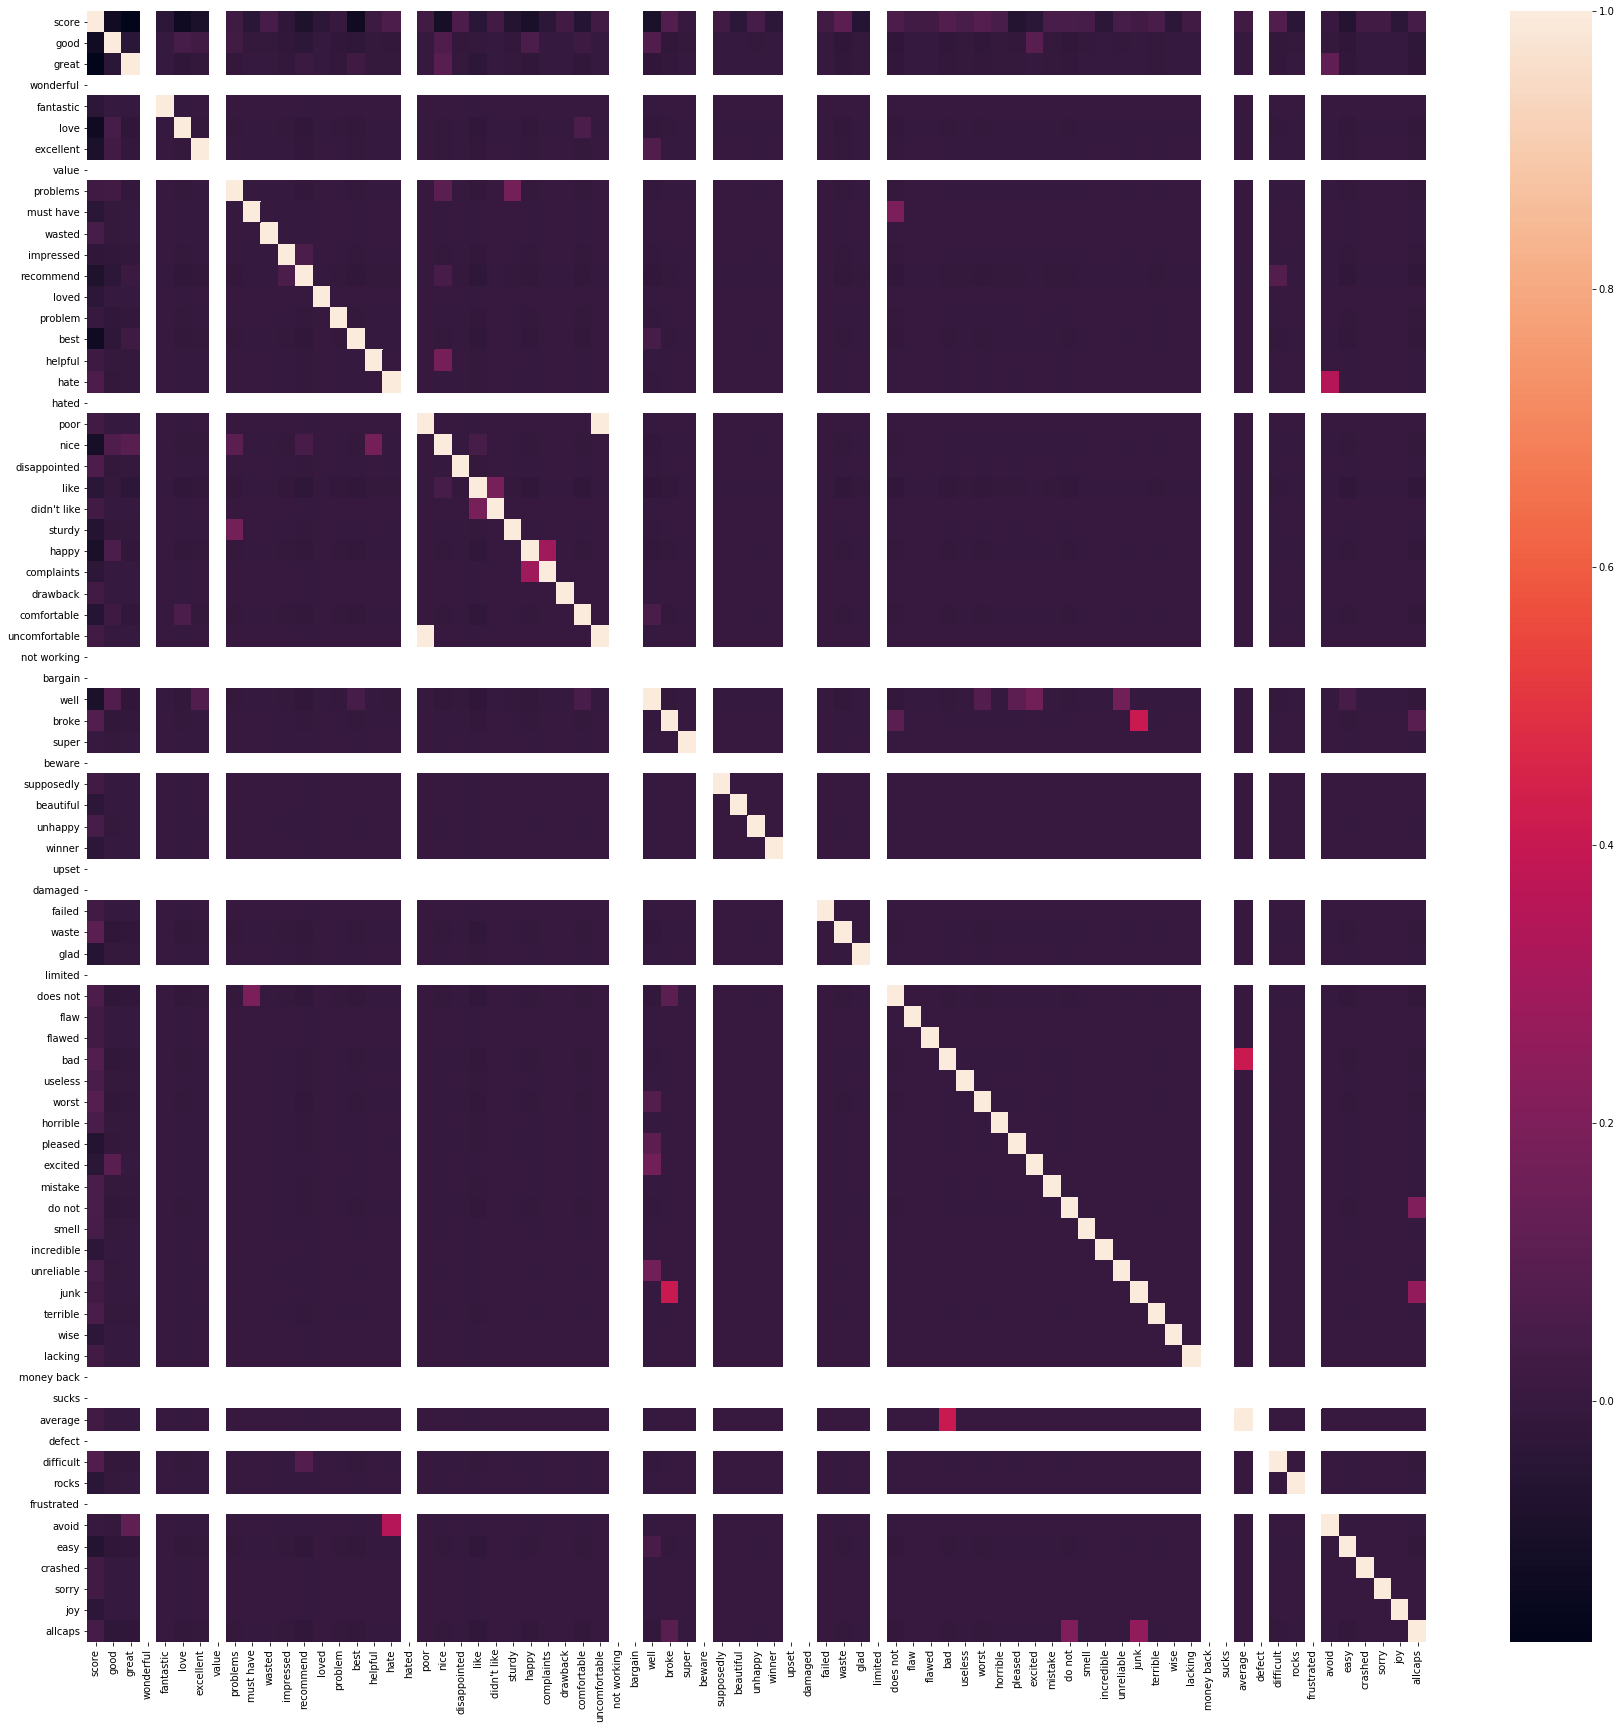

In [8]:
plt.figure(figsize=(30,30))
sns.heatmap(amazon_raw.corr())

In [ ]:
data = amazon_raw[keywords + ['allcaps']]
target = amazon_raw['score']

In [ ]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

In [ ]:
add column to pd of results
amazon_raw['predict'] = y_pred

In [ ]:
amazon_raw.head()

In [ ]:
#calculate the accuracy of your model = success rate
#(total variables - incorrect = correct) / total variables
(data.shape[0]- ((target != y_pred).sum()))/data.shape[0]*100

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(target, y_pred)

In [ ]:
#false = 0 = ham; true = 1 = spam
sms_raw['y_actual'] = sms_raw['spam'].map({False: 0, True: 1})

In [ ]:
#false = 0 = ham; true = 1 = spam
sms_raw['y_predicted'] = sms_raw['y_pred'].map({False: 0, True: 1})

In [ ]:
confusion_matrix = pd.crosstab(sms_raw['y_actual'], sms_raw['y_predicted'], rownames=['Actual'], colnames=['Predicted'])
print (confusion_matrix)

In [ ]:
from sklearn.model_selection import train_test_split
# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(bnb.fit(data, target).score(data, target)))

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(bnb, data, target, cv=10)

In [ ]:
data_path = (r'C:\Users\katec\Thinkful\data_collections\sentiment labelled sentences\yelp_labelled.txt')
yelp_raw = pd.read_csv(data_path, delimiter= '\t', header=None)
yelp_raw.columns = ['sentence', 'score']

In [ ]:
for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    yelp_raw[str(key)] = yelp_raw.sentence.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )